<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

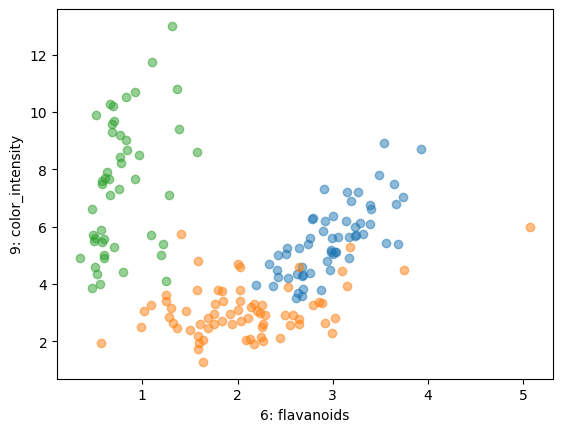

In [4]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [6]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [19]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.21116638e-04, 8.98838043e-05, 1.55925751e-04, 1.27077103e-04,
        1.46627426e-04]),
 'score_time': array([0.00221062, 0.01334119, 0.00240588, 0.01185298, 0.00237417]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[17,  0,  0],
       [ 0, 19,  4],
       [ 1,  5,  8]])

In [10]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7984412750370198

In [11]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [17]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([0.0002408 , 0.00013041, 0.00013185, 0.00017905, 0.000139  ]),
 'score_time': array([0.00722265, 0.00477123, 0.00437999, 0.00438499, 0.00429845]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [26]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([0.00013924, 0.0001235 , 0.00011206, 0.0001359 , 0.00010705]),
 'score_time': array([0.01072168, 0.00916409, 0.00627971, 0.00600553, 0.00582981]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([0.00014043, 0.0001142 , 0.00012732, 0.00010872, 0.00010204,
        0.00920343, 0.00010252, 0.00012779, 0.00011921, 0.00010538,
        0.00011849, 0.0001018 , 0.00011063, 0.00010228, 0.0001061 ,
        0.00012732, 0.00012302, 0.00010276, 0.00011325, 0.00011206,
        0.00011349, 0.00010562, 0.0001142 , 0.00011134, 0.00010657,
        0.0001061 , 0.00011063, 0.00010204, 0.00011134, 0.0001111 ,
        0.00011468, 0.0001123 , 0.00014472, 0.00010848, 0.00011492,
        0.00014853, 0.00011134, 0.0001049 , 0.000103  , 0.0001421 ,
        0.00011253, 0.00011635, 0.00012302, 0.00011277, 0.00011659,
        0.00012112, 0.0001173 , 0.000144  , 0.00011587, 0.00014973]),
 'score_time': array([0.02084589, 0.02400613, 0.01798248, 0.02352238, 0.0075407 ,
        0.0161345 , 0.01523685, 0.01636338, 0.02120566, 0.02306271,
        0.01508236, 0.0153563 , 0.01492953, 0.02385139, 0.01539373,
        0.01973653, 0.01911139, 0.01768732, 0.01671624, 0.02695942,
        0.02411485, 

In [49]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [36]:
modelo.intercept_

array([-202.,   93.,   24.])

In [38]:
modelo.coef_[:,[6,9]]

array([[  389.49    , -1321.689992],
       [  355.78    ,  -660.179997],
       [ -302.52    ,   916.229992]])

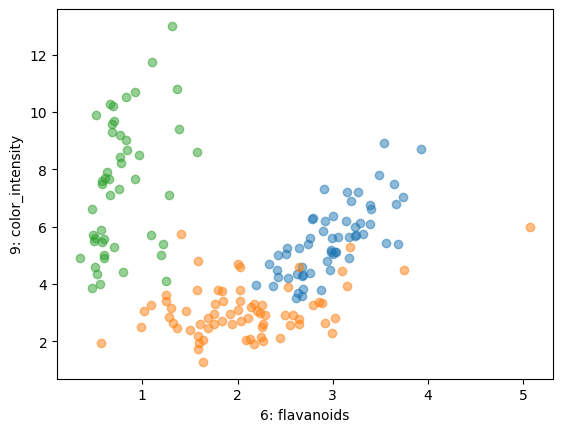

In [39]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()